## TYTANチュートリアル（クラスタリング）

2023年6月5日

ビネクラ安田

出典：[量子アニーリング（QUBO）でクラスタリング](https://vigne-cla.com/21-29/)

### 問題
この10点を３クラスに分割してみます。

<div align="center">
<img src="https://vigne-cla.com/wp-content/uploads/2023/06/21-29_2.png" width = 25%>
</div>

### QUBOモデルでは何が設定できるか？（おさらい）

**<font color="red">One-hotエンコーディング</font>**

例）1～3の自然数のどれかにする（＝3個の量子ビットから1個を１にする。1になった場所を自然数に割り当てる）
```
H = (q0 + q1 + q2 - 1)**2
```

**<font color="red">「2個の量子ビットが同時に1になったらペナルティを与える」</font>**

例）2個の量子ビットが同時に1になったらペナルティを与える
```
H = (q0 * q1)
```

その他の条件式も気になる方は → [量子アニーリングのQUBOで設定可能な条件式まとめ（保存版）](https://vigne-cla.com/21-12/)

### 考え方

この10点を３クラスに分割してみましょう。

```
x = np.array([0.45, 0.80, 0.71, 0.49, 0.79, 0.30, 0.44, 0.14, 0.30, 0.40])
y = np.array([0.14, 0.14, 0.17, 0.25, 0.32, 0.63, 0.68, 0.74, 0.77, 0.84])
```

<div align="center">
<img src="https://vigne-cla.com/wp-content/uploads/2023/06/21-29_2.png" width = 25%>
</div>

まず、各点に3個ずつ量子ビットを割り当ててワンホットとする。例えば、点0は [q0_1, q0_2, q0_3] の3つで表し、q0_1が1になればクラス1といった具合。ワンホットなので「3個の量子ビットから1個を1にする」を設定する。

次に、２点間の距離に応じた設定を行う。

<div align="center">
<img src="https://vigne-cla.com/wp-content/uploads/2023/06/21-29_1-768x425.png" width = 70%>
</div>

「同じクラスに属する点は互いの距離が小さい」というのがクラスタリングの目標である。そこで、<font color="red">ある２点が同じクラスになった場合、その距離に比例したペナルティを加算する。</font>アニーリングでペナルティが最小の解を探すことは、クラス内の相互距離が最小となるクラス分けを探すことに相当する。

「距離ができるだけ小さくなるように」は「できるだけ～になるように」系なので**弱い条件**として重み0.1をかける。

## コード

In [ ]:
!pip install git+https://github.com/tytansdk/tytan

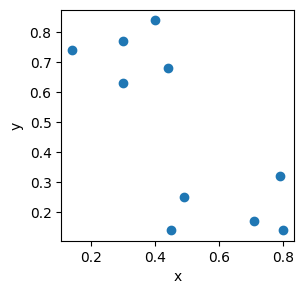

H += 0.1 * 0.35000000000000003 * (q0_1 * q1_1)
H += 0.1 * 0.35000000000000003 * (q0_2 * q1_2)
H += 0.1 * 0.35000000000000003 * (q0_3 * q1_3)
H += 0.1 * 0.26172504656604795 * (q0_1 * q2_1)
H += 0.1 * 0.26172504656604795 * (q0_2 * q2_2)
H += 0.1 * 0.26172504656604795 * (q0_3 * q2_3)
H += 0.1 * 0.11704699910719624 * (q0_1 * q3_1)
H += 0.1 * 0.11704699910719624 * (q0_2 * q3_2)
H += 0.1 * 0.11704699910719624 * (q0_3 * q3_3)
H += 0.1 * 0.3847076812334269 * (q0_1 * q4_1)
H += 0.1 * 0.3847076812334269 * (q0_2 * q4_2)
H += 0.1 * 0.3847076812334269 * (q0_3 * q4_3)
H += 0.1 * 0.5124451190127582 * (q0_1 * q5_1)
H += 0.1 * 0.5124451190127582 * (q0_2 * q5_2)
H += 0.1 * 0.5124451190127582 * (q0_3 * q5_3)
H += 0.1 * 0.540092584655631 * (q0_1 * q6_1)
H += 0.1 * 0.540092584655631 * (q0_2 * q6_2)
H += 0.1 * 0.540092584655631 * (q0_3 * q6_3)
H += 0.1 * 0.6753517601961218 * (q0_1 * q7_1)
H += 0.1 * 0.6753517601961218 * (q0_2 * q7_2)
H += 0.1 * 0.6753517601961218 * (q0_3 * q7_3)
H += 0.1 * 0.647610994347687

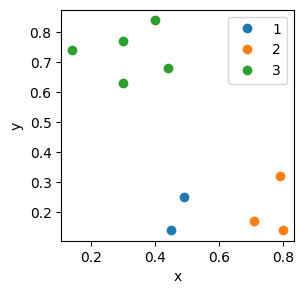

[{'q0_1': 0.0, 'q0_2': 0.0, 'q0_3': 1.0, 'q1_1': 0.0, 'q1_2': 1.0, 'q1_3': 0.0, 'q2_1': 0.0, 'q2_2': 1.0, 'q2_3': 0.0, 'q3_1': 0.0, 'q3_2': 0.0, 'q3_3': 1.0, 'q4_1': 0.0, 'q4_2': 1.0, 'q4_3': 0.0, 'q5_1': 1.0, 'q5_2': 0.0, 'q5_3': 0.0, 'q6_1': 1.0, 'q6_2': 0.0, 'q6_3': 0.0, 'q7_1': 1.0, 'q7_2': 0.0, 'q7_3': 0.0, 'q8_1': 1.0, 'q8_2': 0.0, 'q8_3': 0.0, 'q9_1': 1.0, 'q9_2': 0.0, 'q9_3': 0.0}, -9.752166738118643, 1]
[3 2 2 3 2 1 1 1 1 1]


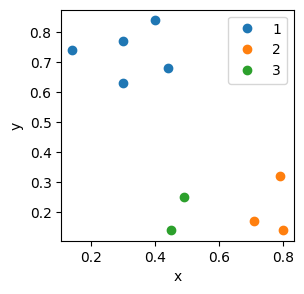

[{'q0_1': 1.0, 'q0_2': 0.0, 'q0_3': 0.0, 'q1_1': 0.0, 'q1_2': 0.0, 'q1_3': 1.0, 'q2_1': 0.0, 'q2_2': 0.0, 'q2_3': 1.0, 'q3_1': 1.0, 'q3_2': 0.0, 'q3_3': 0.0, 'q4_1': 0.0, 'q4_2': 0.0, 'q4_3': 1.0, 'q5_1': 0.0, 'q5_2': 1.0, 'q5_3': 0.0, 'q6_1': 0.0, 'q6_2': 1.0, 'q6_3': 0.0, 'q7_1': 0.0, 'q7_2': 1.0, 'q7_3': 0.0, 'q8_1': 0.0, 'q8_2': 1.0, 'q8_3': 0.0, 'q9_1': 0.0, 'q9_2': 1.0, 'q9_3': 0.0}, -9.752166738118643, 4]
[1 3 3 1 3 2 2 2 2 2]


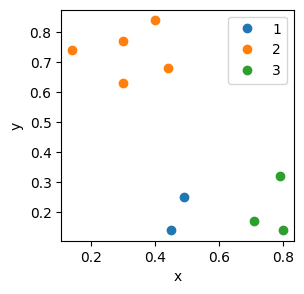

In [7]:
from tytan import symbols, Compile, sampler
import numpy as np
import matplotlib.pyplot as plt


#データ
x = np.array([0.45, 0.80, 0.71, 0.49, 0.79, 0.30, 0.44, 0.14, 0.30, 0.40])
y = np.array([0.14, 0.14, 0.17, 0.25, 0.32, 0.63, 0.68, 0.74, 0.77, 0.84])

#グラフ確認
plt.figure(figsize=(3, 3))
plt.plot(x, y, 'o')
plt.xlabel('x'); plt.ylabel('y')
plt.show()


#量子ビットを用意する、例：q0_1は点0のワンホットクラス1
q0_1, q0_2, q0_3 = symbols('q0_1 q0_2 q0_3')
q1_1, q1_2, q1_3 = symbols('q1_1 q1_2 q1_3')
q2_1, q2_2, q2_3 = symbols('q2_1 q2_2 q2_3')
q3_1, q3_2, q3_3 = symbols('q3_1 q3_2 q3_3')
q4_1, q4_2, q4_3 = symbols('q4_1 q4_2 q4_3')
q5_1, q5_2, q5_3 = symbols('q5_1 q5_2 q5_3')
q6_1, q6_2, q6_3 = symbols('q6_1 q6_2 q6_3')
q7_1, q7_2, q7_3 = symbols('q7_1 q7_2 q7_3')
q8_1, q8_2, q8_3 = symbols('q8_1 q8_2 q8_3')
q9_1, q9_2, q9_3 = symbols('q9_1 q9_2 q9_3')

#各点ともワンホットで一つだけ１になる
H = 0
H += (q0_1 + q0_2 + q0_3 - 1)**2
H += (q1_1 + q1_2 + q1_3 - 1)**2
H += (q2_1 + q2_2 + q2_3 - 1)**2
H += (q3_1 + q3_2 + q3_3 - 1)**2
H += (q4_1 + q4_2 + q4_3 - 1)**2
H += (q5_1 + q5_2 + q5_3 - 1)**2
H += (q6_1 + q6_2 + q6_3 - 1)**2
H += (q7_1 + q7_2 + q7_3 - 1)**2
H += (q8_1 + q8_2 + q8_3 - 1)**2
H += (q9_1 + q9_2 + q9_3 - 1)**2

#2点の組み合わせで
for i in range(9):
    for j in range(i+1, 10):
        #2点の距離
        dist = ((x[i] - x[j])**2 + (y[i] - y[j])**2)**0.5
        
        #同時にクラス1に入った場合のペナルティ
        command = f'H += 0.1 * {dist} * (q{i}_1 * q{j}_1)'
        print(command)
        exec(command)
        
        #同時にクラス2に入った場合のペナルティ
        command = f'H += 0.1 * {dist} * (q{i}_2 * q{j}_2)'
        print(command)
        exec(command)
        
        #同時にクラス3に入った場合のペナルティ
        command = f'H += 0.1 * {dist} * (q{i}_3 * q{j}_3)'
        print(command)
        exec(command)


#コンパイル
qubo, offset = Compile(H).get_qubo()
print(f'offset\n{offset}')

#サンプラー選択
solver = sampler.SASampler()

#サンプリング
result = solver.run(qubo, shots=500)

#上位3件をワンホットから整数に戻して確認
for r in result[:3]:
    print(r)
    
    tmp = np.array(list(r[0].values())).reshape(10, 3)
    ans = np.zeros(10, int)
    for i in range(10):
        ans[i] = np.argmax(tmp[i, :]) + 1
    print(ans)
    
    #グラフ確認
    plt.figure(figsize=(3, 3))
    plt.plot(x[ans==1], y[ans==1], 'o', label='1')
    plt.plot(x[ans==2], y[ans==2], 'o', label='2')
    plt.plot(x[ans==3], y[ans==3], 'o', label='3')
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend()
    plt.show()

最良の解は６通り出てくるが、３クラスが入れ替わっただけなので実質１パターン。ワンホットをクラス番号に戻してグラフで確認すると、適切に分割できていることが分かる。